# Определение перспективного тарифа для телеком компании

Необходимо определить выгодный тарифный план для корректировки рекламного бюджета.

### Описание тарифов
**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

## Оглавление:
* [Шаг 1. Откроем файл с данными и изучим общую информацию.](#1)
* [Шаг 2. Подготовим данные.](#2)
* [Шаг 3. Проанализируем данные.](#3)
* [Шаг 4. Проверим гипотезы.](#4)
* [Шаг 5. Напишем общий вывод.](#5)

### Шаг 1. Откроем файл с данными и изучим общую информацию. <a class="anchor" id="1"></a>

Импортируем библиотеки.

In [1]:
# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки matplotlib для построения графиков>
import matplotlib.pyplot as plt

# <импорт библиотеки seaborn для построения графиков>
import seaborn as sns

# <импорт библиотеки numpy>
import numpy as np

# <импорт библиотеки scipy>
from scipy import stats as st

# <импорт библиотеки math>
import math

# <код, благодаря которму графики отображаются с первого раза>
%matplotlib inline

# <код, благодаря которму датафреймы по ширине будут отображаться полностью>
pd.set_option('display.max_columns', None)

Прочитаем файлы, датафреймы сохраним в переменные:

In [2]:
# <чтение файлов с данными с сохранением в различные переменные>
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Рассмотрим информацию по каждому датафрейму и рассмотрим первые 5 строк:

In [3]:
# <рассмотрим таблицу df_calls>
print(df_calls.info())
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# <рассмотрим таблицу df_internet>
print(df_internet.info())
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
# <рассмотрим таблицу df_messages>
print(df_messages.info())
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
# <рассмотрим таблицу df_tariffs>
print(df_tariffs.info())
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
# <рассмотрим таблицу df_users>
print(df_users.info())
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Рассмотрим полученную информацию подробнее.

Всего имеем 5 таблиц:

Таблица *users* (информация о пользователях):

*	*user_id* — уникальный идентификатор пользователя
*	*first_name* — имя пользователя
*	*last_name* — фамилия пользователя
*	*age* — возраст пользователя (годы)
*	*reg_date* — дата подключения тарифа (день, месяц, год)
*	*churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
*	*city* — город проживания пользователя
*	*tariff* — название тарифного плана

Таблица *calls* (информация о звонках):

*	*id* — уникальный номер звонка
*	*call_date* — дата звонка
*	*duration* — длительность звонка в минутах
*	*user_id* — идентификатор пользователя, сделавшего звонок

Таблица *messages* (информация о сообщениях):

*	*id* — уникальный номер сообщения
*	*message_date* — дата сообщения
*	*user_id* — идентификатор пользователя, отправившего сообщение

Таблица *internet* (информация об интернет-сессиях):

*	*id* — уникальный номер сессии
*	*mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
*	*session_date* — дата интернет-сессии
*	*user_id* — идентификатор пользователя

Таблица *tariffs* (информация о тарифах):

*	*tariff_name* — название тарифа
*	*rub_monthly_fee* — ежемесячная абонентская плата в рублях
*	*minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
*	*messages_included* — количество сообщений в месяц, включённых в абонентскую плату
*	*mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
*	*rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
*	*rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
*	*rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Мы имеем звонки, мегабайты и сообщения. Клиентов, их совершивших. И какие у них тарифы.

### Вывод

Для решения заданий в следующих шагах необходимо составить хотя бы один датафрейм состоящую из данных вышеобозначенных. Сразу видно, что есть проблемы:

* Почему в длительностях звонков нули.
* Все ли действия клиентов происходят после подключения тарифа и до даты прекращения пользования. Может быть один клиент пользовался несколькими тарифами.
* Необходимо привести столбцы даты к типу datetime64.
* Необходимо округлить минуты вверх в будущем датафрейме, они представлены в дробном виде.

Идем дальше.

### Шаг 2. Подготовим данные. <a class="anchor" id="2"></a>

Удалим звонки где длительность звонка = 0. Мы сделаем это потому что наличие таких данных некорректно, эти звонки скорее всего не состоялись, мы не можем это не подтвердить, ни опровергнуть. Если мы не уверены что сам звонок вообще состоялся, то зачем использовать эти данные для исследования.

In [8]:
# <Удалим из выборки звонки, где длительность 0, и проставим индексы заново>
df_cleancalls = df_calls.query('duration != 0')
df_cleancalls = df_cleancalls.reset_index(drop = True)
print('После удаления некорректных звонков осталось {:.1%} записей'.format((df_cleancalls.shape[0])/df_calls.shape[0]))

После удаления некорректных звонков осталось 80.4% записей


Мы удалили много записей, но зато улучшаем репрезентативность выборки.

Округлим минуты и мегабайты вверх, не забываем что даже если мы проговорили 1 секунду, в тарифе засчитывается целая минута, у мегабайтов тоже самое.

In [9]:
# <Используем метод ceil() из библиотеки numpy для округления вверх, а также поменяем тип на целочисленный>
df_cleancalls['duration'] = np.ceil(df_cleancalls['duration']).astype('int64')

In [10]:
# <Используем метод ceil() из библиотеки numpy для округления вверх, а также поменяем тип на целочисленный>
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int64')

Сменим тип данных у дат:

In [11]:
# <Сменим тип данных во всех столбцах таблиц где есть даты>
df_cleancalls["call_date"] = df_cleancalls["call_date"].astype("datetime64")
df_messages["message_date"] = df_messages["message_date"].astype("datetime64")
df_internet["session_date"] = df_internet["session_date"].astype("datetime64")
df_users["reg_date"] = df_users["reg_date"].astype("datetime64")
df_users["churn_date"] = df_users["churn_date"].astype("datetime64")

Преобразуем столбцы дат в столбцы месяцев:

In [12]:
# <Преобразуем столбцы дат в столбцы месяцев>
df_cleancalls["call_date"] = df_cleancalls["call_date"].dt.month
df_messages["message_date"] = df_messages["message_date"].dt.month
df_internet["session_date"] = df_internet["session_date"].dt.month

Мы преобразовали таблицу и теперь можем посчитать:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану

Для этого нам придется создать несколько новых датафреймов:

In [13]:
# <Составим сводную таблицу, сгруппируем данные по пользователям, посчитаем длительность звонков в минутах>
# <для каждого пользователя, затем посчитаем их общее количество.>
monthly_calls =(
df_cleancalls
.pivot_table(index = ['user_id','call_date'], values = 'duration', aggfunc = ['sum','count'])
)
monthly_calls.columns = ['sum_cs','count_cs']
monthly_calls.index.names=['user_id','month']
monthly_calls.reset_index(inplace=True)

In [14]:
# <Составим сводную таблицу, сгруппируем данные по пользователям, и подсчитаем количество id по месяцам отправки сообщений.>
monthly_messages = (
df_messages
.pivot_table(index = ['user_id','message_date'], values = 'id', aggfunc = 'count')
)
monthly_messages.columns = ['count_ms']
monthly_messages.index.names=['user_id','month']
monthly_messages.reset_index(inplace=True)

In [15]:
# <Составим сводную таблицу, сгруппируем данные по пользователям, и просуммируем количество мегабайт по месяцам>
monthly_internet = (
df_internet
.pivot_table(index = ['user_id','session_date'], values = 'mb_used', aggfunc = 'sum')
)
monthly_internet.columns = ['sum_mb']
monthly_internet.index.names=['user_id','month']
monthly_internet.reset_index(inplace=True)

In [33]:
# <импортируем библиотеку для функции isnan>
import math

# <проверим имеют ли дубликаты общий признак>
count_nan = 0 
for row in monthly_internet.index:
    if math.isnan(monthly_internet.loc[row,'sum_mb']):
        count_nan += 1
print(count_nan)

0


In [16]:
# <Создаем датафрейм, где для каждого пользователя будем иметь кол-во минут, звонков, сообщений и мегабайт в месяц.>
all_services = monthly_calls.merge(monthly_messages, on=['user_id','month'], how='outer')
all_services = all_services.merge(monthly_internet, on=['user_id','month'], how='outer')
all_services.reset_index(inplace=True)
all_services.drop(['index'], axis=1, inplace= True)

Добавим к датафрейму столбцы тарифа и города:

In [17]:
# <Добавляем к датафрейму столбцы города и тарифа>
all_services = all_services.merge(df_users[['user_id','tariff','city']], on='user_id', how='outer')

In [18]:
# <рассмотрим таблицу df_tariffs>
df_tariffs.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Подсчитаем для каждого пользователя помесячную выручку:

In [36]:
# <С помощью функции посчитаем выручку, если нет услуг сверх тарифа, берется только абонентская плата, если есть>
# <то подсчитываются дополнительная выручка для каждой услуги и прибавляется к абонентской плате>
def revenue(row):
    user_revenue = 0
    if row['tariff'] == 'smart':
        if row['sum_cs'] > df_tariffs.loc[0, 'minutes_included']:
            calls = abs(df_tariffs.loc[0, 'minutes_included'] - row['sum_cs'])
            user_revenue += calls * df_tariffs.loc[0, 'rub_per_minute']
        if row['count_ms'] > df_tariffs.loc[0, 'messages_included']:
            messages = abs(df_tariffs.loc[0, 'messages_included'] - row['count_ms'])
            user_revenue += messages * df_tariffs.loc[0, 'rub_per_message']
        if row['sum_mb'] > df_tariffs.loc[0, 'mb_per_month_included']:
            internet = abs(df_tariffs.loc[0, 'mb_per_month_included'] - row['sum_mb'])
            user_revenue += np.ceil(internet / 1024) * df_tariffs.loc[0, 'rub_per_gb']
        if user_revenue == 0:
            return df_tariffs.loc[0, 'rub_monthly_fee']
        return df_tariffs.loc[0, 'rub_monthly_fee'] + user_revenue
    else:
        if row['sum_cs'] > df_tariffs.loc[1, 'minutes_included']:
            calls = abs(df_tariffs.loc[1, 'minutes_included'] - row['sum_cs'])
            user_revenue += calls * df_tariffs.loc[1, 'rub_per_minute']
        if row['count_ms'] > df_tariffs.loc[1, 'messages_included']:
            messages = abs(df_tariffs.loc[1, 'messages_included'] - row['count_ms'])
            user_revenue += messages * df_tariffs.loc[1, 'rub_per_message']
        if row['sum_mb'] > df_tariffs.loc[1, 'mb_per_month_included']:
            internet = abs(df_tariffs.loc[1, 'mb_per_month_included'] - row['sum_mb'])
            user_revenue += np.ceil(internet / 1024) * df_tariffs.loc[1, 'rub_per_gb']
        if user_revenue == 0:
            return df_tariffs.loc[1, 'rub_monthly_fee']
        return df_tariffs.loc[1, 'rub_monthly_fee'] + user_revenue

all_services['revenue'] = all_services.apply(revenue, axis=1)
all_services

,user_id,month,sum_cs,count_cs,count_ms,sum_mb,tariff,city,revenue
0,1000,5.0,159.0,17.0,22.0,2256.0,ultra,Краснодар,1950.0
1,1000,6.0,172.0,28.0,60.0,23257.0,ultra,Краснодар,1950.0
2,1000,7.0,340.0,41.0,75.0,14016.0,ultra,Краснодар,1950.0
3,1000,8.0,408.0,42.0,81.0,14070.0,ultra,Краснодар,1950.0
4,1000,9.0,466.0,46.0,57.0,14581.0,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19588.0,smart,Санкт-Петербург,1550.0
3212,1489,11.0,NaN,NaN,20.0,17516.0,smart,Санкт-Петербург,1150.0
3213,1489,12.0,NaN,NaN,35.0,17341.0,smart,Санкт-Петербург,950.0
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский,1950.0


In [37]:
# <Удалим два пропуска, которые появились после присоединения таблицы с тарифами.>
all_services = all_services[~(all_services['month'].isnull())]

In [38]:
all_services = all_services.fillna(0)

### Вывод

* Мы избавились от несуществующих звонков и обосновали почему.
* Округлили вверх мегабайты и минуты, "Мегалайн" действует именно так при учете тарифных услуг.
* Сменили полные даты на месяцы, так как для анализа нам этого достаточно. Мы знаем что исследуем действия абонентов за 2018 год.
* Подсчитали для каждого пользователя пользование услугами помесячно, а также подсчитали помесячную выручку.

Мы можем приступить к анализу.

### Шаг 3. Проанализируем данные. <a class="anchor" id="3"></a>

Подсчитаем для тарифа "Смарт" дисперсию, стандартное отклонение и среднее, при подсчете дисперсии обратим внимание что речь идет о выборке, а не о генеральной совокупности.

Начнем с количества минут:

In [39]:
# <для расчета дисперсии используем метод numpy, добавим аргумент ddof = 1, чтобы обозначить что речь идет о выборке>
sum_cs_smart_disp = np.var(all_services[all_services['tariff'] == 'smart']['sum_cs'], ddof=1)
sum_cs_smart_standard_deviation = np.sqrt(sum_cs_smart_disp)
sum_cs_smart_mean = all_services[all_services['tariff'] == 'smart']['sum_cs'].mean()
print('Среднее:', sum_cs_smart_mean)
print('Дисперсия:', sum_cs_smart_disp)
print('Стандартное отклонение:', sum_cs_smart_standard_deviation)

Среднее: 417.9349484073576
Дисперсия: 36219.31578434428
Стандартное отклонение: 190.31372988921288


Построим гистограмму распределения значений минут разговора для пользователей тарифа "Смарт":

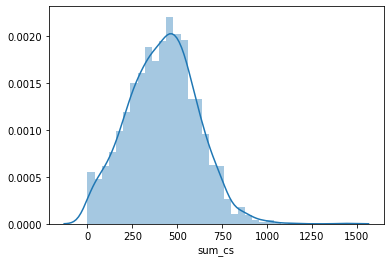

In [40]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'smart']['sum_cs'])

Распределение чуть-чуть скошенно вправо, клиенты крайне редко выговаривают больше 1000 минут. Посмотрим, как будет выглядеть гистограмма, если мы ограничимся тремя сигмами (стандартным отклонением) от среднего.

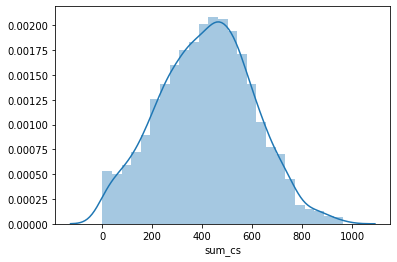

In [41]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[(all_services['tariff'] == 'smart') & (all_services['sum_cs'] < 987)]['sum_cs'])

Больше похоже на нормальное распределение, посмотрим сколько данных мы используем таким образом:

In [42]:
# <Подсчитаем какой процент данных лежит в пределе трех сигм>
all_services[(all_services['tariff'] == 'smart') & (all_services['sum_cs'] < 987)].count()/all_services[all_services['tariff'] == 'smart'].count()

user_id     0.99686
month       0.99686
sum_cs      0.99686
count_cs    0.99686
count_ms    0.99686
sum_mb      0.99686
tariff      0.99686
city        0.99686
revenue     0.99686
dtype: float64

99% как и в теории оказалось покрыто тремя сигмами. Учитывая среднее и нижеописанный третий квартиль, можно сделать вывод что большинство абонентов тарифа "Смарт" укладываются в бесплатный лимит.

In [43]:
# <подсчитаем ниже какого значения лежит 66% значений>
all_services[all_services['tariff'] == 'smart']['sum_cs'].quantile(0.66)

499.0

Перейдем к количеству сообщений:

In [44]:
# <для расчета дисперсии используем метод numpy, добавим аргумент ddof = 1, чтобы обозначить что речь идет о выборке>
count_ms_smart_disp = np.var(all_services[all_services['tariff'] == 'smart']['count_ms'], ddof=1)
count_ms_smart_standard_deviation = np.sqrt(count_ms_smart_disp)
count_ms_smart_mean = all_services[all_services['tariff'] == 'smart']['count_ms'].mean()
print('Среднее:', count_ms_smart_mean)
print('Дисперсия:', count_ms_smart_disp)
print('Стандартное отклонение:', count_ms_smart_standard_deviation)

Среднее: 33.384028712427096
Дисперсия: 796.8129584480083
Стандартное отклонение: 28.22787555676141


Построим гистограмму распределения значений количества сообщений для пользователей тарифа "Смарт":

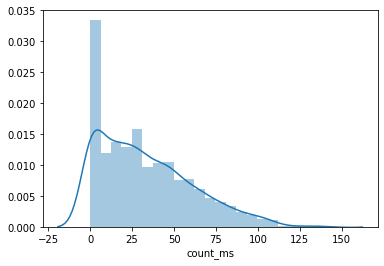

In [45]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'smart']['count_ms'])

Распределение напоминает Пуассоновское, с увеличением количества сообщений, уменьшается их частота.

Учитывая среднее и нижеописанный третий квартиль, можно сделать вывод что большинство абонентов тарифа "Смарт" укладываются в бесплатный лимит.

In [46]:
# <подсчитаем ниже какого значения лежит 73% значений>
all_services[all_services['tariff'] == 'smart']['count_ms'].quantile(0.73)

49.0

Перейдем к количеству мегабайт интернета:

In [47]:
# <для расчета дисперсии используем метод numpy, добавим аргумент ddof = 1, чтобы обозначить что речь идет о выборке>
sum_mb_smart_disp = np.var(all_services[all_services['tariff'] == 'smart']['sum_mb'], ddof=1)
sum_mb_smart_standard_deviation = np.sqrt(sum_mb_smart_disp)
sum_mb_smart_mean = all_services[all_services['tariff'] == 'smart']['sum_mb'].mean()
print('Среднее:', sum_mb_smart_mean)
print('Дисперсия:', sum_mb_smart_disp)
print('Стандартное отклонение:', sum_mb_smart_standard_deviation)

Среднее: 16229.188425302826
Дисперсия: 34545911.12695753
Стандартное отклонение: 5877.576977544193


Построим гистограмму распределения значений количества мегабайт для пользователей тарифа "Смарт":

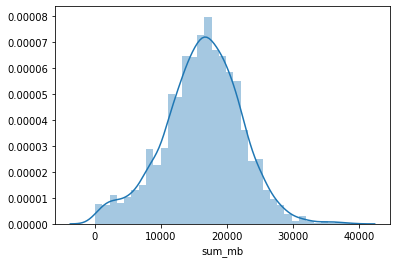

In [48]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'smart']['sum_mb'])

Распределение совсем чуть-чуть скошенно вправо, абоненты крайне редко используют больше 33000 мб.

In [49]:
# <подсчитаем ниже какого значения лежит 41% значений>
all_services[all_services['tariff'] == 'smart']['sum_mb'].quantile(0.41)

15308.0

Только 41% абонентов укладываются в бесплатный лимит.

Подсчитаем для тарифа "Ультра" дисперсию, стандартное отклонение и среднее, при подсчете дисперсии обратим внимание что речь идет о выборке, а не о генеральной совокупности.

Начнем с количества минут:

In [50]:
# <для расчета дисперсии используем метод numpy, добавим аргумент ddof = 1, чтобы обозначить что речь идет о выборке>
sum_cs_ultra_disp = np.var(all_services[all_services['tariff'] == 'ultra']['sum_cs'], ddof=1)
sum_cs_ultra_standard_deviation = np.sqrt(sum_cs_ultra_disp)
sum_cs_ultra_mean = all_services[all_services['tariff'] == 'ultra']['sum_cs'].mean()
print('Среднее:', sum_cs_ultra_mean)
print('Дисперсия:', sum_cs_ultra_disp)
print('Стандартное отклонение:', sum_cs_ultra_standard_deviation)

Среднее: 526.6233502538071
Дисперсия: 100873.63339730098
Стандартное отклонение: 317.6060978591264


Построим гистограмму распределения значений минут разговора для пользователей тарифа "Ультра":

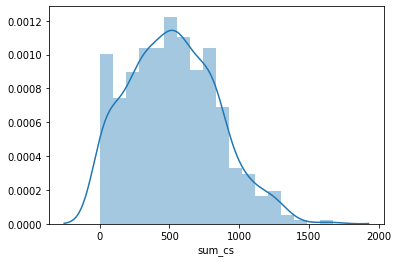

In [51]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'ultra']['sum_cs'])

Распределение с трудом напоминает нормальное, скошено вправо, абоненты редко выговаривают больше 1500 минут. Все абоненты укладываются в бесплатный лимит.

Перейдем к количеству сообщений:

In [52]:
# <для расчета дисперсии используем метод numpy, добавим аргумент ddof = 1, чтобы обозначить что речь идет о выборке>
count_ms_ultra_disp = np.var(all_services[all_services['tariff'] == 'ultra']['count_ms'], ddof=1)
count_ms_ultra_standard_deviation = np.sqrt(count_ms_ultra_disp)
count_ms_ultra_mean = all_services[all_services['tariff'] == 'ultra']['count_ms'].mean()
print('Среднее:', count_ms_ultra_mean)
print('Дисперсия:', count_ms_ultra_disp)
print('Стандартное отклонение:', count_ms_ultra_standard_deviation)

Среднее: 49.36345177664975
Дисперсия: 2285.2661425446736
Стандартное отклонение: 47.804457350174715


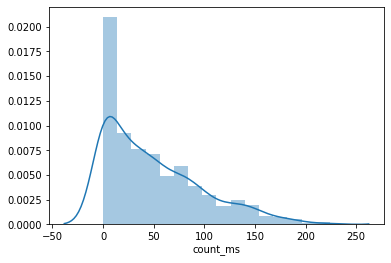

In [53]:
# <Построим гистограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'ultra']['count_ms'])

Распределение напоминает Пуассоновское, с увеличением количества сообщений, уменьшается их частота. Все абоненты укладываются в бесплатный лимит.

Перейдем к количеству мегабайт интернета:

In [54]:
# <для расчета дисперсии используем метод numpy, добавим аргумент ddof = 1, чтобы обозначить что речь идет о выборке>
sum_mb_ultra_disp = np.var(all_services[all_services['tariff'] == 'ultra']['sum_mb'], ddof=1)
sum_mb_ultra_standard_deviation = np.sqrt(sum_mb_ultra_disp)
sum_mb_ultra_mean = all_services[all_services['tariff'] == 'ultra']['sum_mb'].mean()
print('Среднее:', sum_mb_ultra_mean)
print('Дисперсия:', sum_mb_ultra_disp)
print('Стандартное отклонение:', sum_mb_ultra_standard_deviation)

Среднее: 19486.90152284264
Дисперсия: 101935621.04821923
Стандартное отклонение: 10096.317202238608


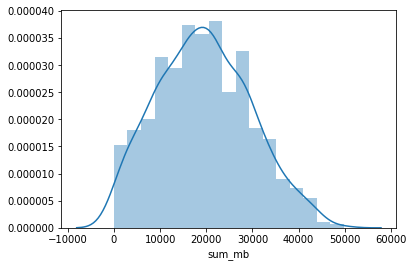

In [55]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'ultra']['sum_mb'])

Распределение совсем чуть-чуть скошенно вправо, абоненты крайне редко используют больше 50000 мб.

In [56]:
# <подсчитаем ниже какого значения лежит 86% значений>
all_services[all_services['tariff'] == 'ultra']['sum_mb'].quantile(0.86)

30582.68

86% абонентов тарифа "Ультра" укладываются в бесплатный лимит.

Наглядно сравним поведение пользователей двух тарифов, отобразив показатели на одном графике, количество минут:

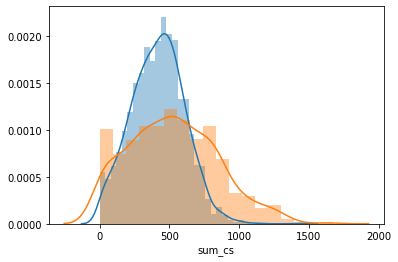

In [57]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'smart']['sum_cs'])
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'ultra']['sum_cs'])

Большинство значений количества минут у пользователей тарифа "Смарт" распределено вокруг значения в 500 минут - в пределах бесплатного лимита. В "Ультра" лимит гораздо больше, и ни один пользователь из выборки не выговаривает его полностью. Выборка тарифа "Ультра" меньше, возможно при большом количестве значений, распределение было бы больше похоже на нормальное.

Количество сообщений:

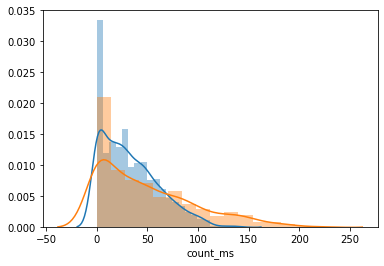

In [58]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'smart']['count_ms'])
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'ultra']['count_ms'])

Пользователи тарифа "Ультра" более спокойно посылают большое количество сообщений, у них огромный лимит. В "Смарт" есть меньшинство которое превышает бесплатный лимит. Общий тренд - мало кому нужны SMS в 2020 =)

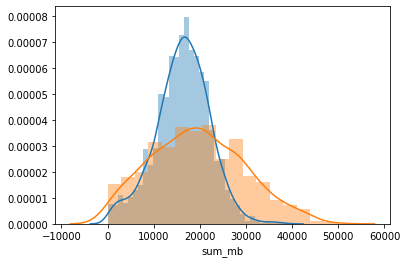

In [59]:
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'smart']['sum_mb'])
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(all_services[all_services['tariff'] == 'ultra']['sum_mb'])

Пользователи обоих тарифов превышают бесплатный лимит. Но если в "Ультра" это делают меньшинство, то в "Смарт" - большинство. Это вызвано тем что людям в наше время всегда нужно много интернета, а также тем тем что в "Ультра" больше лимит. Выборка тарифа "Ультра" меньше, возможно при большом количестве значений, распределение было бы больше похоже на нормальное.

### Вывод

* Мы посчитали среднее, дисперсию и стандартное отклонение по выборке. Убедились на примере количества минут тарифа "Смарт" что в пределах трех сигм лежит 99% значений.
* Большинство клиентов тарифа "Смарт" укладываются в 1000 минут телефонных звонков, "Ультра" - 1500. При этом для "Смарт" это дорогая оплата сверх беплатного лимита, а для "Ультра" - в пределах бесплатного лимита.
* Больше половины клиентов тарифа "Смарт" укладываются в бесплатный лимит звонков, смс. Только 41% абонентов тарифа "Смарт" укладываются в бесплатный лимит по интернету.
* Все абоненты тарифа "Ультра" из выборки укладываются в бесплатный лимит звонков, смс. 86% абонентов тарифа "Ультра" укладываются в бесплатный лимит по интернету.
* Люди редко пользуются сообщениями, потому распределение Пуассоновское. Много сообщений смс в наше время люди отправляют крайне редко.
* Высокие значения количества минут, мегабайт некоторых абонентов скашивают нормальные распределения. Без выбросов количество минут и мегабайт близки к нормальному распределению.

Перейдем к проверке гипотез.

### Шаг 4. Проверим гипотезы. <a class="anchor" id="4"></a>

Необходимо проверить гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Начнем с первой. Сформулируем нулевую и альтернативную гипотезы:

**H₀:** Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

**H₁:** Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Подсчитаем средние выручки для обоих тарифов:

In [60]:
# <Посчитаем среднее для выручки по обоим тарифам>
smart_mean = all_services[all_services['tariff'] == 'smart']['revenue'].mean()
ultra_mean = all_services[all_services['tariff'] == 'ultra']['revenue'].mean()
print('Средняя выручка тарифа "Смарт":', smart_mean)
print('Средняя выручка тарифа "Ультра":', ultra_mean)

Средняя выручка тарифа "Смарт": 1294.6393001345896
Средняя выручка тарифа "Ультра": 2071.0659898477156


Создадим переменные для наших выборок с выручками тарифов:

In [61]:
# <Создадим переменные для наших выборок с выручками тарифов>
smart_revenue = all_services[all_services['tariff'] == 'smart']['revenue']
ultra_revenue = all_services[all_services['tariff'] == 'ultra']['revenue']

Для проверки гипотезы применим критерий Стьюдента (проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам) Подберем уровень значимости (*alpha*) равный 0.05.

In [62]:
# <Уровень значимости>
alpha = 0.05

# <Метод библиотеки scipy, позволяющий проверить гипотезу о равенстве двух средних>
results =  st.ttest_ind(
    smart_revenue, 
    ultra_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Вероятность того что гипотеза **H₀** верна крайне мала, судя по p - значению. Результаты исследования подтверждают то что мы увидели выше , средняя выручка сильно различаются. На основе данных выборок мы можем сказать что альтернативная гипотеза верна.

Проверим гипотезу о том что:
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Начнем с первой. Сформулируем нулевую и альтернативную гипотезы:

**H₀:** Средняя выручка от пользователей из Москвы равна выручке по пользователям из регионов.

**H₁:** Средняя выручка от пользователей из Москвы  отличается от выручки по пользователям из регионов.

In [63]:
# <Посчитаем среднюю выручку в Москве и в регионах>
moscow_mean = all_services[all_services['city'] == 'Москва']['revenue'].mean()
region_mean = all_services[all_services['city'] != 'Москва']['revenue'].mean()
print('Средняя выручка в Москве', moscow_mean)
print('Средняя выручка в регионах:', region_mean)

Средняя выручка в Москве 1550.8052373158755
Средняя выручка в регионах: 1528.3169419900116


In [64]:
# <Создадим переменные для наших выборок с выручками тарифов>
moscow_revenue = all_services[all_services['city'] == 'Москва']['revenue']
region_revenue = all_services[all_services['city'] != 'Москва']['revenue']

Для проверки гипотезы применим критерий Стьюдента (проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам). Подберем уровень значимости (*alpha*) равный 0.05.

In [66]:
# <Уровень значимости>
alpha = 0.05

# <Метод библиотеки scipy, позволяющий проверить гипотезу о равенстве двух средних>
results =  st.ttest_ind(
    region_revenue, 
    moscow_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, средняя выручка по пользователям из Москвы примерно равна выручке по пользователям из регионов. На этой выборке. Результаты исследования подтверждают то что мы видели выше со средними по регионам и по Москве, они примерно равны.

### Вывод

* Как я формулировал нулевую и альтернативную гипотезы? Прежде всего по теории в спринте мне известно что в нулевой гипотезе должно быть знак равенства. А альтернативная гипотеза должна быть альтернативой нулевой гипотезе.
* Критерий и метод scipy был выбран исходя из заданий в тренажере в спринта, в нашей работе речь идет о выборках, это всего лишь 500 пользователей. Соответственно это проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, и метод *.ttest_ind*
* p_value полученные нами после теста не дают двояких выводов по этой выборке, первая гипотеза была подтверждена, а вторая опровергнута.

### Шаг 5. Напишем общий вывод <a class="anchor" id="5"></a>

* Было сначала очень непонятно как объединять таблицы, сначала объединил их и подготовил. Затем решил подготовить каждую отдельно, сделать сводную как просят в 1 шаге, далеко не сразу догадался что можно сделать индексы столбцами. В итоге на мой взгляд вышло быстро и удобно. Но можно и лучше.
* Я проверил что данные по звонкам , сообщениям и интернету укладываются в сроки пользования тарифом пользователями. Все укладывается. Но в работе решил этого не оставлять. То же и с дубликатами.
* Средняя выручка тарифа "Смарт": 1294, cредняя выручка тарифа "Ультра": 2071. Больше денег приносит тариф "Ультра" и с точки зрения бизнеса это плюс. Клиенту здорово иметь неограниченный интернет и это плюс. Абонентская плата этого тарифа огромна (с точки зрения бытового опыта) и это минус. "Смарт" на мой взгляд был бы идеальным вариантом для клиента будь у него безлимитный интернет. Если у нас нет альтернатив, стоило бы вложиться в "Ультра" больше - популяризовать цифровой образ жизни и все такое. Но лучший вариант - создать нечто среднее между ними, они слишком поляризованы. 